# Проект: Принятие решений в бизнесе интернет-магазина.

## Описание проекта.
**Описание:** совместно с отделом маркетинга аналитики подготовили список гипотез для увеличения выручки интернет-магазина.

**Цель исследования:** требуется приоритизировать гипотезы, запустить A/B-тест и проанализируйть результаты. 

**Основные задачи, которые необходимо выполнить:**
Выполнение проекта состоит из двух частей.

*Часть 1. Приоритизация гипотез:*
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

*Часть 2. Анализ A/B-теста:*
1. Построить график кумулятивной выручки по группам. Сделайть выводы и предположения.
2. Постройть график кумулятивного среднего чека по группам. Сделайть выводы и предположения.
3. Постройть график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайть выводы и предположения.
4. Постройть график кумулятивного среднего количества заказов на посетителя по группам. Сделайть выводы и предположения.
5. Постройть график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайть выводы и предположения.
6. Постройть точечный график количества заказов по пользователям. Сделайть выводы и предположения.
7. Посчитайть 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Постройть точечный график стоимостей заказов. Сделайть выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

**Ход исследования:**
Данные для анализа я получу из файлов: Гипотезы — hypothesis.csv; Заказы — orders.csv; Посетители — /datasets/visitors.csv. О качестве данных заранее ничего не известно, поэтому перед тем, как приступить к целям исследования понадобиться обзор данных.

Проверю данные на ошибки и оценю их влияние на исследование. На этапе предобработки поищу возможность исправить найденные ошибки, которые не преведут к искажению конечного результата.

Создам новые датафреймы из уже предоставленных данных, для решения поставленных задач.

Таким образом мое исследование пройдет этапы:
- загрузка данных,
- обзор данных,
- предобработка данных,
- выполнение задач части 1 - приоритизация гипотез,
- выполнение задач части 2 - анализ A/B-теста,
- написание общего вывода и предложений.

## Описание данных. 
**Данные для первой части:**

*Файл hypothesis.csv - ГИПОТЕЗЫ:*
в файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части:**
Результаты А/В-теста, которые сохранены в файлах orders.csv и visitors.csv.
1. *Файл orders.csv - ЗАКАЗЫ:*
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

2. *Файл visitors.csv - ПОСЕТИТЕЛИ:*
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Загрузка данных.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.dates as mdates # работа с датами
import plotly.express as px
import seaborn as sns
import matplotlib.ticker as ticker
import datetime as dt

from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from ast import literal_eval
from scipy import stats as st #проверка гипотез

In [2]:
pd.set_option('display.max_columns', None)                  # команда для отображения всех столбцов датафрейма
pd.set_option('display.max_rows', None)                     # команда для отображения всех строк датафрейма
pd.set_option('display.float_format', lambda x: '%.3f' % x) # перевод данных из экспоненциальной нотации в обычную
pd.options.display.max_colwidth = None                      # устанавливаем неограниченную ширину столбцов

In [3]:
# Загрузка данных
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv') # гипотезы
    orders = pd.read_csv('/datasets/orders.csv')         # заказы 
    visitors = pd.read_csv('/datasets/visitors.csv')     # посетители
    display("Файлы успешно загружены!")
    
except Exception as e:
    display(f'Не удалось прочитать файл: {e}') # вывод ошибки, если данные не прочитались

'Файлы успешно загружены!'

## Предобработка данных.

### Гипотезы (датафрейм hypothesis).

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


- Данные загружены и читаются корректно.
- Датафрейм **hypothesis** имеет 5 полей и 9 строк.
- Типы данных и написание полей не требуют обработки, т.к. написаны корректно.

Далее проверю данные на наличие пропусков и дубликатов.

In [6]:
# информация о количестве пропусков (в %) в датафрейме hypothesis
display((hypothesis.isna().mean() * 100).sort_values(ascending=False))

Hypothesis   0.000
Reach        0.000
Impact       0.000
Confidence   0.000
Efforts      0.000
dtype: float64

In [7]:
# явные дубликаты всего датафрейма hypothesis
display('Количество полных дубликатов:', hypothesis.duplicated(keep=False).sum())
#display('Процент количества дубликатов:', hypothesis.duplicated(keep=False).sum()/ len(hypothesis)* 100)

'Количество полных дубликатов:'

0

В данных датафрейма **hypothesis** пропусков и полных дубликатов не обнаружено.

Рассмотрю подробнее данные поля Hypothesis.

In [8]:
# вывод списка уникальных значений в столбце hypothesis
hypothesis['Hypothesis'].unique().tolist()

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Запустить собственную службу доставки, что сократит срок доставки заказов',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Запустить акцию, дающую скидку на товар в день рождения']

Будем работать со следующими гипотезами:
1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
2. Запустить собственную службу доставки, что сократит срок доставки заказов.
3. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
4. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.
5. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.
6. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов.
7. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
8. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
9. Запустить акцию, дающую скидку на товар в день рождения.

### Заказы (датафрейм orders).

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


- Данные загружены и читаются корректно.
- Датафрейм **orders** имеет 5 полей и 1197 строк.
- Название полей не требует корректировок.
- Требуется корректировка типа данных поля date с object на datetime.

Далее изменю тип данных поля date и проверю данные на наличие пропусков и дубликатов.

In [11]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
# информация о количестве пропусков (в %) в датафрейме orders
display((orders.isna().mean() * 100).sort_values(ascending=False))

transactionId   0.000
visitorId       0.000
date            0.000
revenue         0.000
group           0.000
dtype: float64

In [13]:
# явные дубликаты всего датафрейма orders
display('Количество полных дубликатов:', orders.duplicated(keep=False).sum())
#display('Процент количества дубликатов:', orders.duplicated(keep=False).sum()/ len(orders)* 100)

'Количество полных дубликатов:'

0

Пропусков и полных дубликатов в данных нет.
Измение типа данных поля date сработало корректно.

Определю период проведения теста.

In [14]:
# Определение периода анализа данных
start_date = orders['date'].min()
end_date = orders['date'].max()

display(f'Период анализа данных: с {start_date} по {end_date}')

'Период анализа данных: с 2019-08-01 00:00:00 по 2019-08-31 00:00:00'

Период взятых для анализа данных по  заказам - Август 2019 год.

Рассмотрю дискретные данные датафрейма orders.

In [15]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
transactionId,1197.000,2155621385.530,1229084904.760,1062393.000,1166775572.000,2145193898.000,3237740112.000,4293855558.000
visitorId,1197.000,2165960143.099,1236014192.147,5114589.000,1111826046.000,2217984702.000,3177606451.000,4283872382.000
revenue,1197.000,8348.006,39191.132,50.000,1220.000,2978.000,8290.000,1294500.000


- минимальная выручка 50, максимальная 1 294 500,
- 25% заказов с выручкой меньше 1220, а 75% заказов с выручкой меньше 8290,
- средняя выручка по обеим группам 8348, а медианная (50%) 2978,
- стандартное отклонение 39 191 - очень велико.

По выведеным статистическим данным можно предположить, что в них присутствуют выбросы, т.к. стандартное отклонение и разница между средним и медианным заначениями велики.

### Посетители (датафрейм visitors).

In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


- Данные загружены и читаются корректно.
- Датафрейм **visitors** имеет 3 поля и 62 строки.
- Название полей не требует корректировок.
- Требуется корректировка типа данных поля date с object на datetime.

Далее изменю тип данных поля date и проверю данные на наличие пропусков и дубликатов.

In [18]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [19]:
# информация о количестве пропусков (в %) в датафрейме visitors
display((visitors.isna().mean() * 100).sort_values(ascending=False))

date       0.000
group      0.000
visitors   0.000
dtype: float64

In [20]:
# явные дубликаты всего датафрейма visitors
display('Количество полных дубликатов:', visitors.duplicated(keep=False).sum())
#display('Процент количества дубликатов:', visitors.duplicated(keep=False).sum()/ len(visitors)* 100)

'Количество полных дубликатов:'

0

Пропусков и полных дубликатов в данных нет.
Измение типа данных поля date сработало корректно.

Определю период проведения теста.

In [21]:
# Определение периода анализа данных
start_date = visitors['date'].min()
end_date = visitors['date'].max()

display(f'Период анализа данных: с {start_date} по {end_date}')

'Период анализа данных: с 2019-08-01 00:00:00 по 2019-08-31 00:00:00'

Период взятых для анализа данных по  заказам - Август 2019 год.

Рассмотрю дискретные данные датафрейма visitors.

In [22]:
visitors.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,62.000,607.290,114.401,361.000,534.000,624.500,710.500,770.000


- минимальное количество посетителей 361, максимальное 770,
- 25% посетителей в день меньше 534, а 75%  меньше 710,
- среднее значение посетителей в день 607, а медианное (50%) 624,
- стандартное отклонение 114.


### Вывод по предобработке данных.
**На этом шаге выполнена следующая работа:**
- изучено корретное отображение информации;
- изучена общая информация о датафреймах;
- изучено наличие пропусков;
- изучены дубликаты;
- определен период анализа данных;
- изучена дискретная информация;
- определен список гипотез.


**Ключевые моменты:**
1. Информация всех датавреймов отображается корректно.
2. Корректировка написания столбцов не требуется.
В датафреймах с информацией о Заказах (orders) и Посетителях (visitors) изменила тип данных столбца 'data' с object на date.
3. Пропуски во всех датафреймах отсутствуют.
4. Полные дубликаты отсутствуют.
5. Дискретная информация:

*Заказы (orders)*
- минимальная выручка 50, максимальная 1 294 500,
- 25% заказов с выручкой меньше 1220, а 75% заказов с выручкой меньше 8290,
- средняя выручка по обеим группам 8348, а медианная (50%) 2978,
- стандартное отклонение 39 191 - очень велико.

По выведеным статистическим данным можно предположить, что в них присутствуют выбросы, т.к. стандартное отклонение и разница между средним и медианным заначениями велики.

*Посетители (visitors)*
- минимальное количество посетителей 361, максимальное 770,
- 25% посетителей в день меньше 534, а 75%  меньше 710,
- среднее значение посетителей в день 607, а медианное (50%) 624,
- стандартное отклонение 114.

6. Период анализа данных Август (с 1 по 31 включительно) 2019 года. Период одинаков для обоих датафреймов с датой (orders, visitors).
7. Список гипотез:
    1. 1 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    2. 2 Запустить собственную службу доставки, что сократит срок доставки заказов.
    3. 3 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
    4. 4 Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.
    5. 5 Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.
    6. 6 Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов.
    7. 7 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
    8. 8 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    9. 9 Запустить акцию, дающую скидку на товар в день рождения.

## Часть 1. Приоритезация гипотез.
Задача:
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [23]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Датафрейм имеет все компоненты для применения способов приоретизации гипотез ICE и RICE:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу.

Все параметры (компоненты) оценены по шкале от 0 до 10.

Гипотезы для приоритизации:
1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
2. Запустить собственную службу доставки, что сократит срок доставки заказов.
3. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
4. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.
5. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.
6. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов.
7. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
8. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
9. Запустить акцию, дающую скидку на товар в день рождения.

### Фреймворк IСE.

Буду расчитывать по формуле 
ICE = (Impact *Confidence)/ Efforts

In [24]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/ hypothesis['Efforts']

# вывод отсортированной таблицы по убываню ICE
display(hypothesis.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


Наиболее перспективные гипотезы по ICE (9, 1, 8, 7, 3):
- (9) Запустить акцию, дающую скидку на товар в день рождения;
- (1) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- (8) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- (7) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
- (3) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

### Фреймворк RICE.
Буду расчитывать по формуле
RICE = (Reach* Impact* Confidence)/ Efforts

In [25]:
hypothesis['RICE'] = (
    (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/ hypothesis['Efforts']
)

# вывод отсортированной таблицы по убываню RICE
display(hypothesis.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.000


Наиболее перспективные гипотезы по RICE (8, 3, 1, 7, 9): 
- (8) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- (3) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- (1) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- (7) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
- (9) Запустить акцию, дающую скидку на товар в день рождения.


### Выводы по приоритизации методами ICE / RICE.
Применив фреймворки ICE / RICE выявлены наиболее приоритетные гипотезы (одинаковые для обоих фреймворков - 1, 3, 7, 8, 9):
- (1) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- (3) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- (7) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
- (8) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- (9) Запустить акцию, дающую скидку на товар в день рождения.

Но порядок приоритизации разный:
- для ICE - это гипотезы 9, 1, 8, 7, 3;
- для RICE - это гипотезы 8, 3, 1, 7, 9.

Разница в приоритизации возникла, т.к. в расчете RICE участвует компонент Reach (скольких пользователей затронет изменение, которое мы хотим внести) и для гипотез 8 и 3 этот компонет самый большой, поэтому эти гипотезы при расчете RICE заняли лидирующие позиции, а для гипотезы 9 Reach - самый маленький (равен 1), поэтому эта гипотеза опустилась вниз по сравнению с ICE.

## Часть 2. Анализ A/B-теста.
Задача:
1. Построить график кумулятивной выручки по группам. Сделайть выводы и предположения.
2. Постройть график кумулятивного среднего чека по группам. Сделайть выводы и предположения.
3. Постройть график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайть выводы и предположения.
4. Постройть график кумулятивного среднего количества заказов на посетителя по группам. Сделайть выводы и предположения.
5. Постройть график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайть выводы и предположения.
6. Постройть точечный график количества заказов по пользователям. Сделайть выводы и предположения.
7. Посчитайть 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Постройть точечный график стоимостей заказов. Сделайть выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.
    
Для решения этих задач буду работать с данными таблиц orders (заказы) и visitors (посетители), эти датафреймы необходимо объединить в один c кумулятивными данными.

In [26]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [27]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [28]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                      orders['group'] == x['group'])]
                      .agg({'date' : 'max',
                            'group' : 'max',
                            'transactionId' : 'nunique',
                            'visitorId' : 'nunique',
                            'revenue' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                        visitors['group'] == x['group'])]
                      .agg({'date' : 'max',
                            'group' : 'max',
                            'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = (
    ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], 
                           right_on=['date', 'group'])
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [29]:
cumulativeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   orders    62 non-null     int64         
 3   buyers    62 non-null     int64         
 4   revenue   62 non-null     int64         
 5   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4+ KB


Датафрейм cumulativeData - это кумулятивные данные со столбцами: 
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

### График кумулятивной выручки по группам.
Построю графики кумулятивной выручки по дням и группам A/B-тестирования.

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


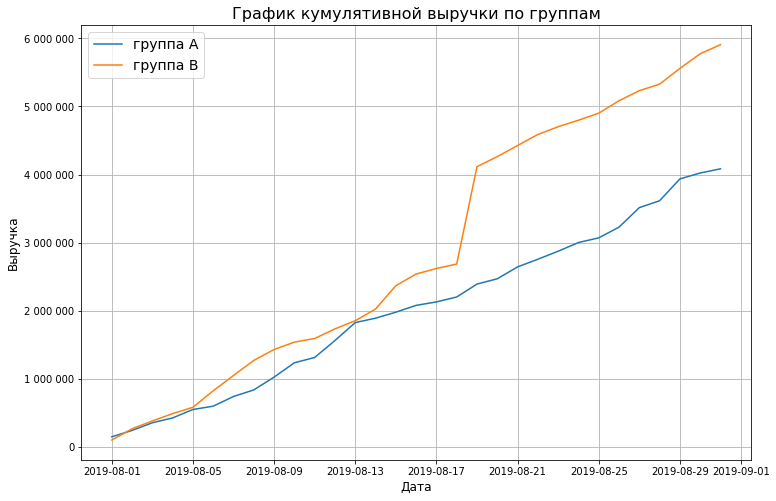

In [30]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
display(cumulativeRevenueA.head())

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
display(cumulativeRevenueB.head())

# задаем размеры графика 
plt.figure(figsize=(12, 8))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')

plt.title('График кумулятивной выручки по группам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка', fontsize=12)

# Настраиваем ось Y для отображения в тысячах/миллионах
ax = plt.gca()  # Получаем текущие оси
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', ' ')))

plt.grid()
plt.legend(fontsize=14)

plt.show()

Примерно до середины теста выручка обеих групп росла примерно одинаково, а с 17 по 21 августа выручка группы В резко "вырвалась вперед" и стала превышеть выручку группы А, что может свидетельствовать об увеличении числа заказов, либо появлении дорогих покупок в группе В.

### График кумулятивного среднего чека по группам.
Построю графики среднего чека по группам — разделю кумулятивную выручку на кумулятивное число заказов.

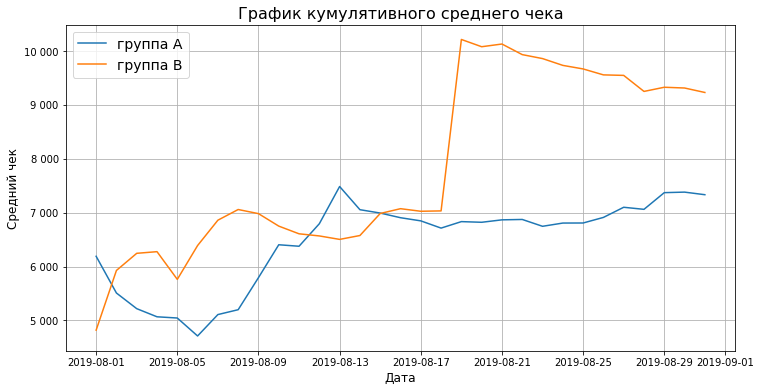

In [31]:
# задаем размеры графика 
plt.figure(figsize=(12, 6))

# график кумулятивного среднего чека гр А
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],
         label='группа A')

# график кумулятивного среднего чека гр В
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],
         label='группа B')

# параметры графика
plt.title('График кумулятивного среднего чека', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек', fontsize=12)

# Настраиваем ось Y для отображения в тысячах/миллионах
ax = plt.gca()  # Получаем текущие оси
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', ' ')))

plt.grid()
plt.legend(fontsize=14)

plt.show()

Из выведенных данных кумулятивного среднего чека по группам, можно сказать следующее:
1. кумулятивный ср чек группы А:
- с начала теста и примерно до 6.08.19 видна тенденция падения,
- с 6.08.19 до 13.08.19 наблюдается плавная тенденция роста,
- с 13.08.19 график стабилизировался и до конца теста остается в пределах 6800 - 7200 размера кумулятивного среднего чека.
2. Кумулятивный ср чек группы В:
- с начала теста и до примерно 18.08.19 наблюдается плавная тенденция роста среднего чека, за исключением  падений 5.08 и 9.08,
- 18.08.19 наблюдается резкий (аномальный) скачек роста с примерно 7000 до 10000, что может свидетельствовать о крупных (дорогих) заказах в группе В,
- далее график стабилизируется до конца теста и держится примерно в диапазоне 9000-10000.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101
5,2019-08-06,598401,127,824337,129
6,2019-08-07,740818,145,1049671,153
7,2019-08-08,837097,161,1270589,180
8,2019-08-09,1025603,177,1431401,205
9,2019-08-10,1236098,193,1539203,228


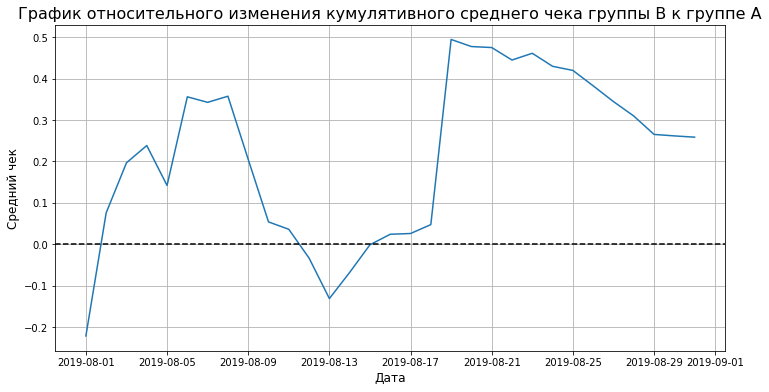

In [32]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date',
                                                   right_on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])
)
display(mergedCumulativeRevenue)

# задаем размеры графика 
plt.figure(figsize=(12, 6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


# параметры графика
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек', fontsize=12)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid()
plt.show()

Судя по графику, можно сделать несколько выводов:
1. Резкие колебания в начале – в первые дни наблюдается волатильность, что может быть связано с небольшим количеством данных и влиянием отдельных крупных заказов.
2. Спад в середине периода – с8 по 13 августа (середина теста) средний чек группы B резко снижается относительно группы A. Это может говорить о том, что в группе A были крупные покупки или в группе B уменьшился средний чек.
3. Резкий рост после падения – после снижения средний чек группы B восстанавливается и даже превышает группу A (примерно 13–19 августа). Это снова может быть связано с крупными заказами или изменением пользовательского поведения.
4. Снижение ближе к концу – после пика относительный средний чек группы B снова снижается, но остаётся выше нулевой отметки, что указывает на преимущество группы B.
5. Группа B в целом показывает более высокий средний чек.


### График кумулятивного среднего количества заказов на посетителя по группам.
Аналогично графику куммуликативного среднего чека проанализирую график кумулятивного среднего количества заказов на посетителя по группам. 

In [33]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
display(cumulativeDataA)

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
display(cumulativeDataB)


,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033
2,2019-08-02,A,44,38,242401,1338,0.033
4,2019-08-03,A,68,62,354874,1845,0.037
6,2019-08-04,A,84,77,425699,2562,0.033
8,2019-08-05,A,109,100,549917,3318,0.033
10,2019-08-06,A,127,114,598401,3985,0.032
12,2019-08-07,A,145,131,740818,4629,0.031
14,2019-08-08,A,161,146,837097,5239,0.031
16,2019-08-09,A,177,159,1025603,5856,0.030
18,2019-08-10,A,193,175,1236098,6262,0.031


,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029
3,2019-08-02,B,45,43,266748,1294,0.035
5,2019-08-03,B,61,59,380996,1803,0.034
7,2019-08-04,B,78,75,489567,2573,0.030
9,2019-08-05,B,101,98,581995,3280,0.031
11,2019-08-06,B,129,123,824337,3935,0.033
13,2019-08-07,B,153,146,1049671,4644,0.033
15,2019-08-08,B,180,171,1270589,5298,0.034
17,2019-08-09,B,205,193,1431401,5908,0.035
19,2019-08-10,B,228,215,1539203,6277,0.036


Из выведенных данных видно, что conversion в обеих группах варьируется в диапазоне 0.029 - 0.038, значит для графика задам масштаб осей методом plt.axis(), передадам ему минимальное и максимальное значения оси x (дата проведения теста) '2019-08-01', '2019-08-30'; минимальное и максимальное значения оси y (значения conversion) — 0.028, 0.038.

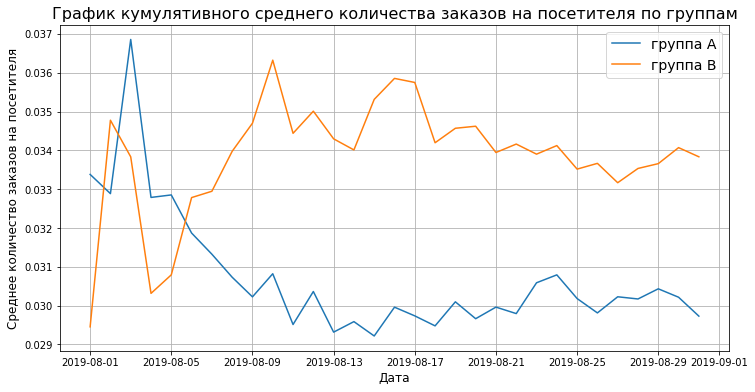

In [34]:
# задаем размеры графика 
plt.figure(figsize=(12, 6))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='группа B')

# параметры графика
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее количество заказов на посетителя', fontsize=12)
plt.legend(fontsize=14)
plt.grid()



plt.show()

В начале теста среднее количество заказов на одно посетителя группы А было выше, чем группы В. Примерно 6.08 значения обеих групп поравнялись, а делее значение среднего количества заказов группы В стало выше, чем в группе А. 

###  График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

In [35]:
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']],
           left_on='date', right_on='date',
           how='left',
           suffixes=['A', 'B'])
)
display(mergedCumulativeConversions)

,date,conversionA,conversionB
0,2019-08-01,0.033,0.029
1,2019-08-02,0.033,0.035
2,2019-08-03,0.037,0.034
3,2019-08-04,0.033,0.030
4,2019-08-05,0.033,0.031
5,2019-08-06,0.032,0.033
6,2019-08-07,0.031,0.033
7,2019-08-08,0.031,0.034
8,2019-08-09,0.030,0.035
9,2019-08-10,0.031,0.036


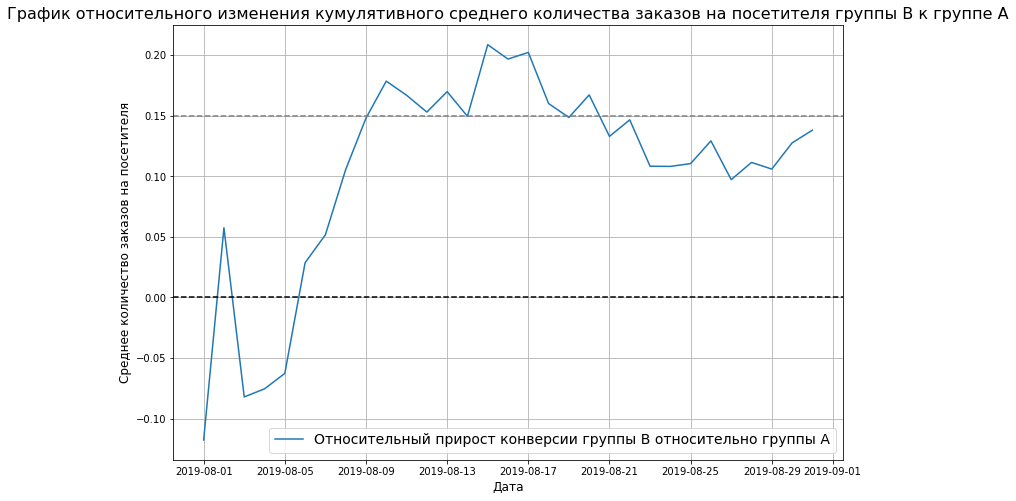

In [36]:
# задаем размеры графика 
plt.figure(figsize=(12, 8))

# строим график
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")

# добавляем оси
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

# параметры графика
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее количество заказов на посетителя', fontsize=12)
plt.legend(fontsize=14)
plt.grid()

plt.show()

Видно, что в начале теста группа В проигрывала группе А по конверсии, но начиная с 6-го дня таста группа В вышла в лидеры и с 9.08 по 19.08 приимущество группе В было примерно на 15-20% больше, далее снизлось до 10%, а к концу теста снова наблюдается тенденция к росту.

В целом, кажется, что отношение среднего количества заказов на посетителя ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя, сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Точечный график количества заказов по пользователям.

In [37]:
# Подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


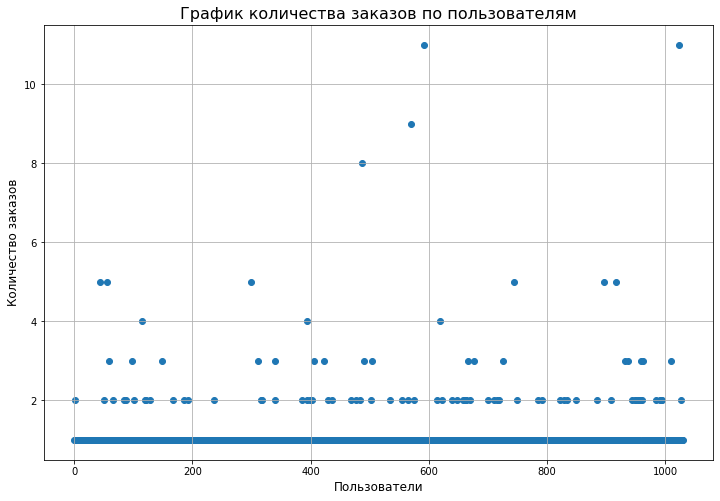

In [38]:
# задаем размеры графика 
plt.figure(figsize=(12, 8))

# строим график
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

# параметры графика
plt.title('График количества заказов по пользователям', fontsize=16)
plt.xlabel('Пользователи', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.grid()

plt.show()

пользователей, которые совершили более 2-ух заказов мало, а тех кто совершил больше 5 заказов - совсем единицы. Их точная доля не ясна, значит непонятно, можно ли считать их аномалиями или нет.

Далее посчитаю выборочные перцентили количества заказов на одного пользователя и выберу границу для определения аномальных пользователей.

### 95-й и 99-й перцентили количества заказов на пользователя.

In [39]:
display(np.percentile(ordersByUsers['orders'], [95, 99])) 

array([2., 4.])

- Не более 5% пользователй совершили больше 2-х заказов.
- Не более 1 % пользователей совершили больше 4-х заказов.

Следовательно, разумно считать, что верхняя граница заказов на одного пользователя - 2, все остальное - выбросы.

### Точечный график стоимостей заказов.

In [40]:
# Выводим результат
display(orders[['visitorId', 'revenue']].sort_values(by='revenue', ascending=False).head(10))


,visitorId,revenue
425,1920142716,1294500
1196,2108080724,202740
858,1316129916,93940
1136,1307669133,92550
744,888512513,86620
682,4266935830,78990
662,4266935830,78990
743,4133034833,67990
1103,1164614297,66350
1099,148427295,65710


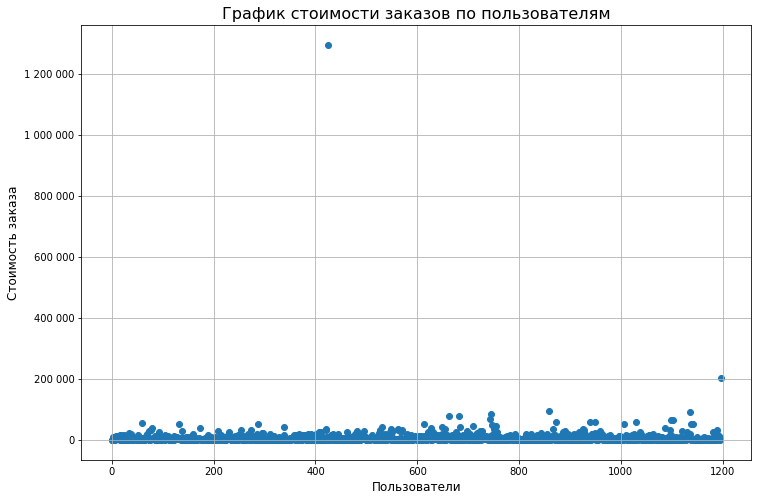

In [41]:
# задаем размеры графика 
plt.figure(figsize=(12, 8))

# строим график
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue'])

# параметры графика
plt.title('График стоимости заказов по пользователям', fontsize=16)
plt.xlabel('Пользователи', fontsize=12)
plt.ylabel('Стоимость заказа', fontsize=12)

# Настраиваем ось Y для отображения в тысячах/миллионах
ax = plt.gca()  # Получаем текущие оси
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', ' ')))

plt.grid()
plt.show()

Из графика видно, что большая часть заказов разпределена по стоимость до 20 000, более 50 00 - ето единичные заказы, так же присутствуют заказы 200 000 и больше 1 200 000. Их точная доля не ясна, значит непонятно, можно ли считать их аномалиями или нет.

Далее посчитаю выборочные перцентили стоимости заказов на одного пользователя и выберу границу для определения аномальных пользователей.

### 95-й и 99-й перцентили стоимости заказов.

In [42]:
display(np.percentile(orders['revenue'], [95, 99])) 

array([28000. , 58233.2])

- Не более 5% пользователй совершили заказ стоимостью больше 28 000.
- Не более 1 % пользователей совершили заказ стоимостью больше 58 233.

Следовательно, разумно считать, что верхняя граница стоимость заказа на одного пользователя - 28 000, все остальное - выбросы.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
Перед подсчетом статистичиской значимости различий необходимо подготовить данные и соформулировать гипотезы. Данные для анализа сохраню в переменную data.


In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head()) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Описание датафрейма **data**:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Посчитаю статистическую значимость различий в среднем числе заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.
Гипотезы:
- *H_0 (нулевая)*: Среднее количество заказов на посетителя групп A и B равны, статистически значимых отличий нет;
- *H_1 (альтернативная)*: Среднее количество заказов на посетителя групп A и B различны, статистически значимые отличия есть.

Создадам переменные **ordersByUsersA** и **ordersByUsersB** со столбцами ['visitorId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажу число совершённых заказов. 

Объявлю переменные **sampleA** и **sampleB**, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [44]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:', format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


P-value: 0.016792355056752608
Относительные различия: 0.138


По "сырым" данным есть статистичиски значимые различия в среднем количестве заказов на посетителя между группами А и В:
- *P-value* меньше 0.05 (5%) и равно 0.0167, значит отвергаем нулевую гипотезу;
- относительный прирост среднего группы В к конверсии группы А равен 13.8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.
Гипотезы:
- H_0 (нулевая): Средний чек на посетителя групп A и B равны, статистически значимых отличий нет;
- H_1 (альтернативная): Средний чек на посетителя групп A и B различны, статистически значимые отличия есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадам критерию mannwhitneyu() данные о выручке с заказов. 

In [45]:
print('P-value:',
      format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:',
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1))

P-value: 0.7292909855432458
Относительные различия: 0.259


По "сырым" данным НЕТ статистичиски значимых различий в среднем чеке на посетителя между группами А и В:
- *P-value* больше 0.05 (5%) и равно 0.729, значит не отвергаем нулевую гипотезу;
- относительное различие между средними чеками посетителя группы А и В составляет 26%.

###  Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Ранее определила, что выбросами являются те пользователи, кто совершил более двух заказов и заказы дороже 28 000 (таких пользователей меньше 5%), значит их и буду считать аномальными. Отфильтрую данные и удалю таких пользователей из анализа.


In [57]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Количество аномальных пользователей:', abnormalUsers.shape[0]) 

Количество аномальных пользователей: 74


In [56]:
# Код ревьюера
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsersA['orders'], 95)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsersB['orders'], 95)]['visitorId'],
    ],
    axis=0,
)


usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Количество аномальных пользователей:', abnormalUsers.shape[0])

Количество аномальных пользователей: 74


Посчитаю статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. .

In [47]:
# выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#Применим статистический критерий Манна-Уитни к полученным выборкам

print('P-value:', format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.013042592743036745
Относительные различия: 0.173


Критерии по очищенным данным практически не изменились с критериями "сырых" данных (P-value: 0.0167, Относительные различия: 0.138), значит ЕСТЬ статистичиски значимые различия в среднем количестве заказов на посетителя между группами А и В. Группа В лучше группы А.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.


In [48]:
print(
    'P-value:',
    format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.738481751314565
Относительные различия: -0.020


По очищенным данным значение p-value стало больше (было 72,9%, стало 73,8%), однако относительные различия уменьшились и гр В стала проигрывать на 2%, это означает, что в данных стало меньше шума. По очищенным данным НЕТ статистичиски значимых различий в среднем чеке на посетителя между группами А и В.

### Выводы A/B тестирования:
**Имеющиеся факты:**
- Есть статистически значимое различие в среднем количестве заказов на посетителя между группами по «очищенным» данным и по "сырым данным".
- Нет статистически значимого различия в среднем чеке заказа между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A.
- График различия среднего чека говорит о том, что результаты группы B лучше группы А примерно на 20%.

**На основании фактов можно сделать вывод:** Остановить тест, зафиксировать победу группы В.

## Общие выводы по проекту.

**В ходе проведенного исследования были выполнены следующие задачи:**
- загрузка данных,
- обзор данных,
- предобработка данных,
- часть 1 - приоритизация гипотез,
- часть 2 - анализ A/B-теста.

**Ключевые моменты**

1. ***Загрузка данных*** все данные загружены успешно.

2. ***Обзор и предобработка данных*** 
- Информация всех датавреймов отображается корректно.
- Корректировка написания столбцов не требуется. В датафреймах с информацией о Заказах (orders) и Посетителях (visitors) изменила тип данных столбца 'data' с object на date.
- Пропуски во всех датафреймах отсутствуют.
- Полные дубликаты отсутствуют.
- Период анализа данных Август (с 1 по 31 включительно) 2019 года. Период одинаков для обоих датафреймов с датой (orders, visitors).
- Список гипотез:
    1. 1 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    2. 2 Запустить собственную службу доставки, что сократит срок доставки заказов.
    3. 3 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
    4. 4 Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.
    5. 5 Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.
    6. 6 Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов.
    7. 7 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
    8. 8 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    9. 9 Запустить акцию, дающую скидку на товар в день рождения.

3. ***Приоритизация гипотез***
Применив фреймворки ICE / RICE выявлены наиболее приоритетные гипотезы (одинаковые для обоих фреймворков - 1, 3, 7, 8, 9):
- (1) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- (3) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- (7) Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
- (8) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- (9) Запустить акцию, дающую скидку на товар в день рождения.

Но порядок приоритизации разный:
- для ICE - это гипотезы 9, 1, 8, 7, 3;
- для RICE - это гипотезы 8, 3, 1, 7, 9.

Разница в приоритизации возникла, т.к. в расчете RICE участвует компонент Reach (скольких пользователей затронет изменение, которое мы хотим внести) и для гипотез 8 и 3 этот компонет самый большой, поэтому эти гипотезы при расчете RICE заняли лидирующие позиции, а для гипотезы 9 Reach - самый маленький (равен 1), поэтому эта гипотеза опустилась вниз по сравнению с ICE.

4. ***Анализ А/В теста***
- *Вывод:* Остановить тест, зафиксировать победу группы В.
- *Имеющиеся факты:*
    - Есть статистически значимое различие в среднем количестве заказов на посетителя между группами по «очищенным» данным и по "сырым данным".
    - Нет статистически значимого различия в среднем чеке заказа между группами ни по «сырым», ни по данным после фильтрации аномалий;
    - График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A.
    - График различия среднего чека говорит о том, что результаты группы B лучше группы А примерно на 20%.